# Sign Language Detection

Here I will be creating a model that will detect hand signs and map them to the corresponding letter or number.
<br> I will be following the ASL format of hand sign.

In [62]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


from tensorflow.keras.layers import Input, Lambda, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

In [3]:
train_path = "dataset/train"
test_path = "dataset/test"

In [4]:
x_train = []

for folder in os.listdir(train_path):
    sub_path = train_path+"/"+folder
    for img in os.listdir(sub_path):
        img_path = sub_path+"/"+img
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [5]:
x_test = []

for folder in os.listdir(test_path):
    sub_path = test_path+"/"+folder
    for img in os.listdir(sub_path):
        img_path = sub_path+"/"+img
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [6]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [7]:
print("Total images in training set = {}".format(len(x_train)))
print("Total images in testing set = {}".format(len(x_test)))

Total images in training set = 2012
Total images in testing set = 503


In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range=0.2,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range=0.2,
                                   zoom_range=0.2)

In [106]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [10]:
y_train = train_set.classes
y_test = test_set.classes

train_set.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

### Plotting sample images from the train_set

In [41]:
label_names = ['0', '1', '2', '3', '4', '5', 
               '6', '7', '8', '9', 'A', 'B', 
               'C', 'D', 'E', 'F', 'G', 'H', 
               'I', 'J', 'K', 'L', 'M', 'N', 
               'O', 'P', 'Q', 'R', 'S', 'T', 
               'U', 'V', 'W', 'X', 'Y', 'Z']

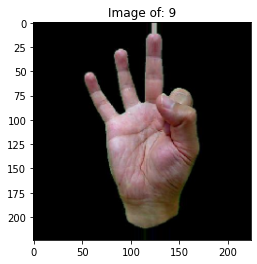

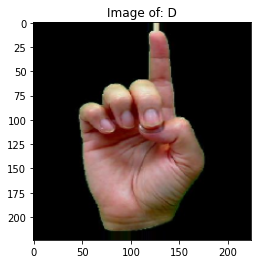

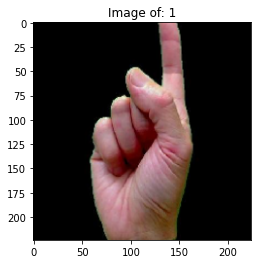

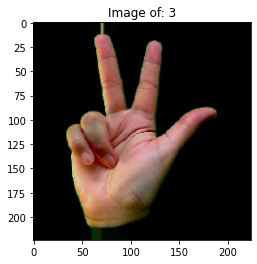

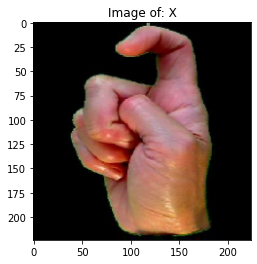

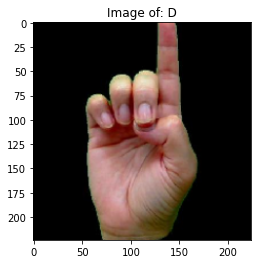

In [43]:
imgs, labels = next(iter(train_set))
counter = 0
for img, label in zip(imgs, labels):
    value=np.argmax(label)
    labelname=label_names[value]
    plt.imshow(img)
    plt.title("Image of: "+labelname)
    plt.show()
    counter+=1
    if(counter>5):
        break

## InceptionV3 transfer learning

In [13]:
base_model = InceptionV3(input_shape=(224,224,3),
                        include_top=False,
                        weights = "imagenet")

In [14]:
base_model.trainable = False

In [16]:
model = Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(),
    Dense(36, activation="softmax")])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 36)                294948    
                                                                 
Total params: 22,097,732
Trainable params: 294,948
Non-trainable params: 21,802,784
_________________________________________________________________


In [18]:
model.compile(optimizer=Adam(learning_rate = 0.01),
              loss = CategoricalCrossentropy(),
              metrics = [CategoricalAccuracy()])

In [21]:
model.fit(train_set,
         validation_data = test_set,
         steps_per_epoch = 32,
         epochs = 32)

Epoch 1/32
32/32 [==============================] - 114s 4s/step - loss: 75.7752 - categorical_accuracy: 0.2549 - val_loss: 26.1806 - val_categorical_accuracy: 0.5229
Epoch 2/32
32/32 [==============================] - 132s 4s/step - loss: 11.3058 - categorical_accuracy: 0.6520 - val_loss: 6.3638 - val_categorical_accuracy: 0.7555
Epoch 3/32
32/32 [==============================] - 160s 5s/step - loss: 7.4541 - categorical_accuracy: 0.7431 - val_loss: 6.3073 - val_categorical_accuracy: 0.8231
Epoch 4/32
32/32 [==============================] - 157s 5s/step - loss: 6.0897 - categorical_accuracy: 0.8157 - val_loss: 8.4653 - val_categorical_accuracy: 0.7893
Epoch 5/32
32/32 [==============================] - 143s 4s/step - loss: 5.2440 - categorical_accuracy: 0.8167 - val_loss: 5.5587 - val_categorical_accuracy: 0.8509
Epoch 6/32
32/32 [==============================] - 115s 4s/step - loss: 3.8357 - categorical_accuracy: 0.8676 - val_loss: 7.1680 - val_categorical_accuracy: 0.8072
Epoch 7

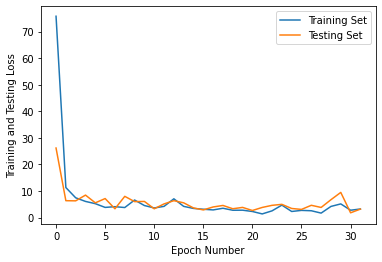

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('Training and Testing Loss')
plt.plot(model.history.history['loss'], label='Training Set')
plt.plot(model.history.history['val_loss'], label='Testing Set')
plt.legend()

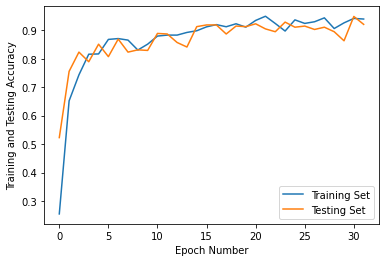

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Training and Testing Accuracy')
plt.plot(model.history.history['categorical_accuracy'], label='Training Set')
plt.plot(model.history.history['val_categorical_accuracy'], label='Testing Set')
plt.legend()

In [24]:
model_name = 'SignLanguage_recognition_inceptionv3.h5'
model.save(model_name, save_format='h5')

In [25]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [47]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 503 images belonging to 36 classes.


In [48]:
predictions = model.predict(test_set)

16/16 [==============================] - 20s 1s/step


In [59]:
y_pred = [np.argmax(p) for p in predictions]
y_true = test_set.classes

for i in range(len(y_pred)):
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.format(i, y_true[i], y_pred[i]))

index =  0, True class => 0, 0 <= Predicted class
index =  1, True class => 0, 0 <= Predicted class
index =  2, True class => 0, 0 <= Predicted class
index =  3, True class => 0, 0 <= Predicted class
index =  4, True class => 0, 0 <= Predicted class
index =  5, True class => 0, 0 <= Predicted class
index =  6, True class => 0, 0 <= Predicted class
index =  7, True class => 0, 0 <= Predicted class
index =  8, True class => 0, 0 <= Predicted class
index =  9, True class => 0, 0 <= Predicted class
index = 10, True class => 0, 0 <= Predicted class
index = 11, True class => 0, 0 <= Predicted class
index = 12, True class => 0, 0 <= Predicted class
index = 13, True class => 0, 24 <= Predicted class
index = 14, True class => 1, 1 <= Predicted class
index = 15, True class => 1, 1 <= Predicted class
index = 16, True class => 1, 1 <= Predicted class
index = 17, True class => 1, 1 <= Predicted class
index = 18, True class => 1, 1 <= Predicted class
index = 19, True class => 1, 1 <= Predicted class

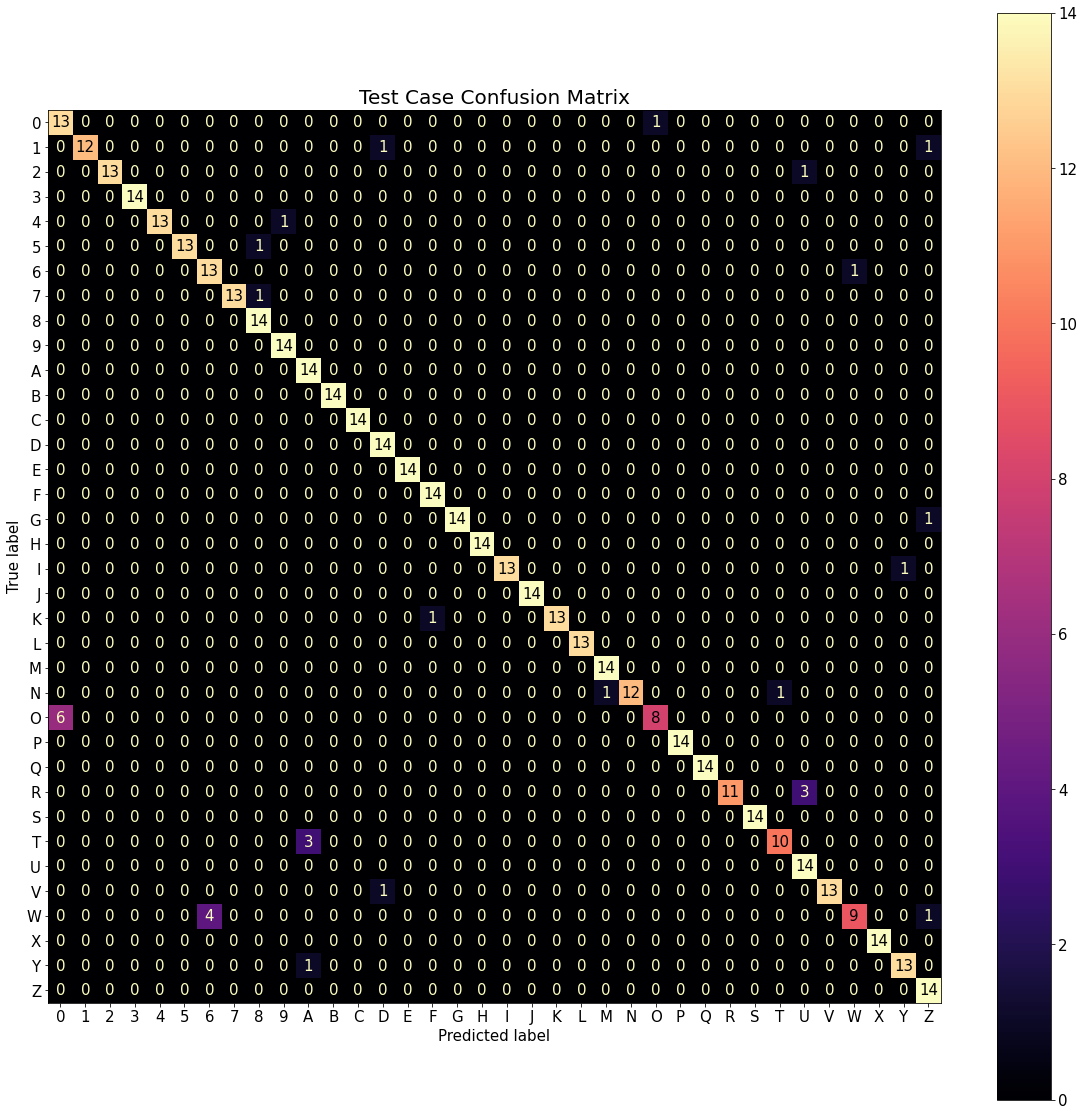

In [95]:
%matplotlib inline

cm = confusion_matrix(y_true, y_pred)
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['font.size'] = 15
display_cm = ConfusionMatrixDisplay(cm, display_labels=label_names)

display_cm.plot(cmap='magma')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Test Case Confusion Matrix', fontsize=20)

plt.show()

In [105]:
model.evaluate(test_set)

16/16 [==============================] - 41s 2s/step - loss: 3.4983 - categorical_accuracy: 0.9463


[3.498288869857788, 0.9463220834732056]

## Testing Accuracy on Validation Set

In [107]:
validation_path = "dataset/validation"

validation_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range=0.2,
                                   zoom_range=0.2)

validation_set = validation_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 391 images belonging to 36 classes.


In [108]:
predictions = model.predict(validation_set)

13/13 [==============================] - 45s 3s/step


In [109]:
y_pred_validation = [np.argmax(p) for p in predictions]
y_true_validation = validation_set.classes 

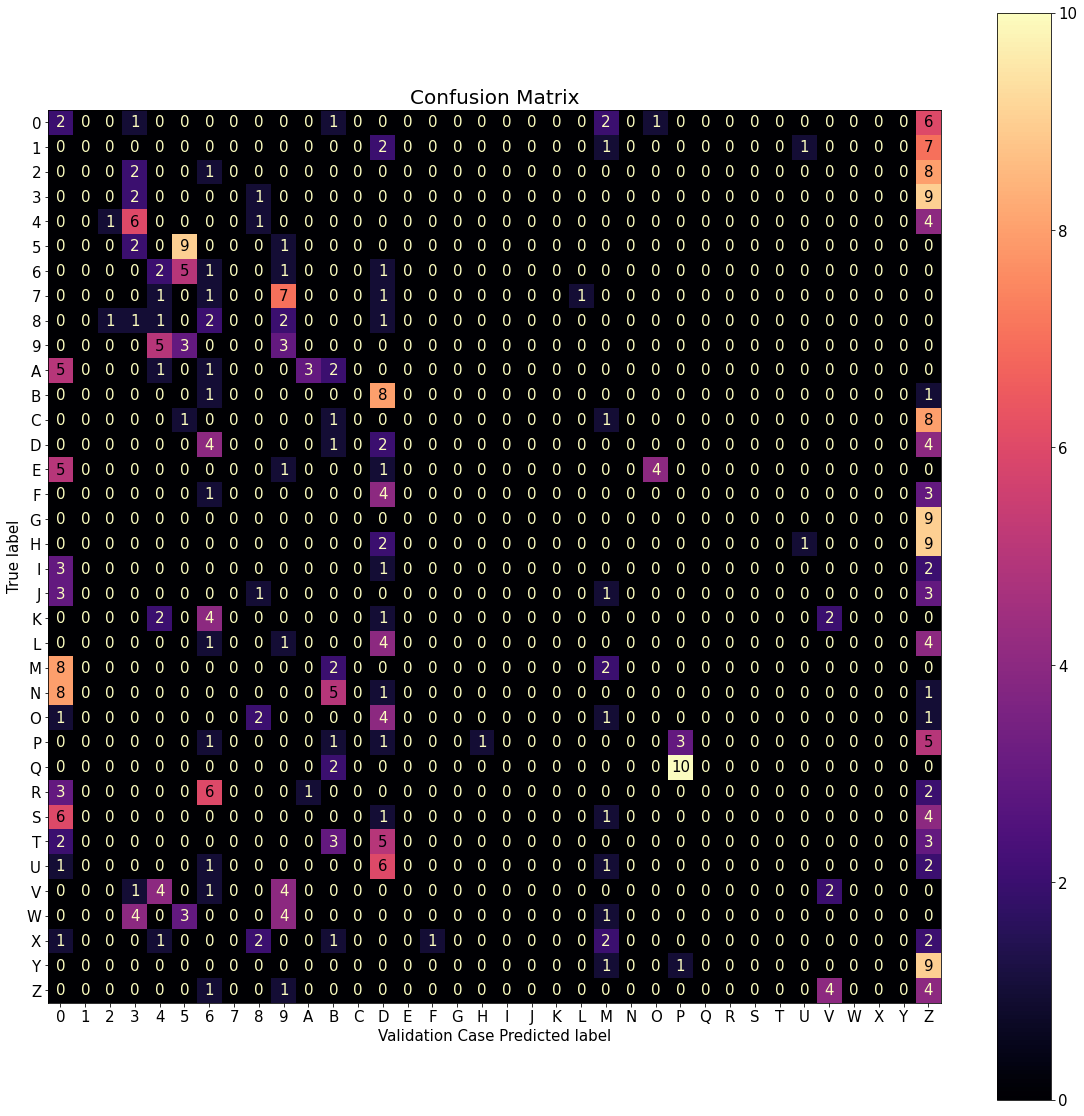

In [110]:
%matplotlib inline

cm = confusion_matrix(y_true_validation, y_pred_validation)
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['font.size'] = 15
display_cm = ConfusionMatrixDisplay(cm, display_labels=label_names)

display_cm.plot(cmap='magma')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('True label')
plt.xlabel('Validation Case Predicted label')

plt.title('Confusion Matrix', fontsize=20)

plt.show()

In [ ]:
results = model.evaluate(validation_set)

10/13 [======================>.......] - ETA: 13s - loss: 128.1626 - categorical_accuracy: 0.0906